<a href="https://colab.research.google.com/github/UERJ-FISICA/ML4PPGF_UERJ/blob/PPGF-2023-2/06-DecisionTrees.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<!--BOOK_INFORMATION-->
<img align="left" width= 150 style="padding-right:10px;" src="https://covers.oreillystatic.com/images/0636920052289/lrg.jpg">

*Essa aula é inteiramente baseada no **capítulo 6** do livro [Hands-On Machine Learning with Scikit-Learn & TensorFlow](http://shop.oreilly.com/product/0636920052289.do) by Aurélien Geron; os notebooks do livro estão disponíveis [no GitHub](https://github.com/ageron/handson-ml).*

# Decision Trees

As Decision Trees são algoritmos versáteis de ML **Supervisionado**, que podem ser usadas para para **classificação** e **regressão**.

## O que são Decision Trees

Para entender o que é uma Decision Tree, vamos começar **Treinando e Visualizando uma Decision Tree**.

Construiremos um Decision Tree e veremos como ela faz predições.

O código abaixo treina um _DecisionTreeClassifier_ no conjunto de dados de iris.

**Iris dataset**: Famoso conjunto de dados o comprimento e a largura das pétalas e sépalas de 150 flores Iris de 3 espécies diferentes: Iris-Setosa, Iris-Versicolor e Iris-Virginica.

![](https://s3.amazonaws.com/assets.datacamp.com/blog_assets/Machine+Learning+R/iris-machinelearning.png)


Vamos começar com os imports e setups habituais.

In [1]:
# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

In [2]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier

iris = load_iris() # returns a dictionary-like object
print("iris dataset keys: ", iris.keys())
print('iris["target_names"]: ', iris['target_names'])
print("iris['target'] = ", iris['target'])
print("target lenght: ", len(iris['target']))
print("iris['feature_names: ']", iris['feature_names'])
print("iris['data'][0,:] = ", iris.data[0,:])
print("iris['data'][0, 2:] = ", iris.data[0,2:])

iris dataset keys:  dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])
iris["target_names"]:  ['setosa' 'versicolor' 'virginica']
iris['target'] =  [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]
target lenght:  150
iris['feature_names: '] ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
iris['data'][0,:] =  [5.1 3.5 1.4 0.2]
iris['data'][0, 2:] =  [1.4 0.2]


In [3]:
X = iris.data[:, 2:] # petal length and width
y = iris.target

tree_clf = DecisionTreeClassifier(max_depth=2, random_state=42)
tree_clf.fit(X, y)

DecisionTreeClassifier(max_depth=2, random_state=42)

Para visualizar a árvore de decisão que foi treinada, vamos usar a função ```plot_tree``` do ```sklearn```. (Atualização de 2023, não mais usando graphviz)

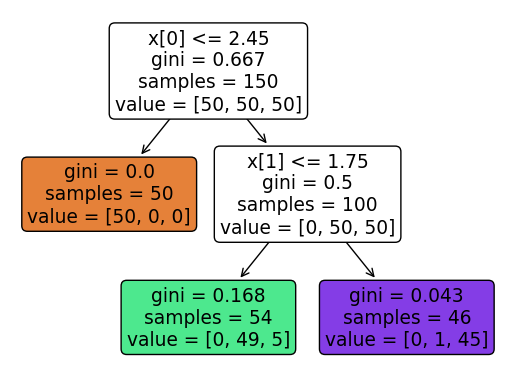

In [4]:
from sklearn.tree import plot_tree
plot_tree(tree_clf, filled=True, rounded=True)
plt.show()

A **Decision Tree** tem uma estrutura de ***fluxograma***.

* Cada "caixinha" é chamada de ***node***
* **Root Node:** Representa a população ou amostra e é subdividido em conjuntos homogêneos (de acordo com a decisão do node)
* **Splitting:** é o processo de sub-dividir o node em sub-nodes
* **Decision Node:** Quando um node se divide em outros sub-nodes, ele é um node de decisão
* **Leaf/ Terminal Node:** Os nodes que não se sub-dividem mais são chamados de "folhas" (***leafs***) ou "nodes terminais".
* **Pruning:** Quando removemos sub-nodes de um node de decisão, chamamos esse processo de ***prunning***.
* **Branch / Sub-Tree:** Uma sub-seção de uma tree inteira é chamada de "galho" (***branch***) ou ***sub-tree***.
* **Parent and Child Node:** Um node que é sub-dividido em sub-nodes é chamado de ***parent node***. Os sub-nodes são chamados de ***child node***.

## Fazendo predições com a Decision Tree

Partimos de uma amostra de treinamento ( conjunto de dados de ***iris***) e construímos uma **decision tree** que aprendeu com o nosso conjunto de dados de treinamento.

Para fazer predições sobre o tipo de uma flor de íris desconhecida, a nossa tree começará pelo **root node** e seguirá o fluxograma até determinar o tipo de flor de íris. E assim por diante para cada nova flor de íris a ser classificada.

Na figura acima, cada node tem uma série de variáveis:

* **samples**: é um atributo. Conta a quantas instâncias de treinamento o node se aplica.
* **depth**: é a ***profundidade da tree***, definida pelas "camadas" formadas pelos sub-nodes. Nosso exemplo tem depth=2.
* **value**: O atributo de um node chamado *value*, nos diz a quantas instâncias de cada classificação (***target_names***) o node se aplica. Por exemplo: [0,1,45] nos diz que esse node se aplica a 0 iris do tipo Setosa, 1 do tipo Versicolor e 45 do tipo Virginica.
* **gini**: atributo que mede a ***impureza*** do node.
   * **node puro:** gini = 0 ==> todas as instâncias às quais o node se aplica pertencem somente a uma classificação.

A impureza de Gini (**gini score**) é calculada a partir da seguinte equação:

\begin{equation*}
G_i = 1 - \sum_{k=1}^{n} p_{i,k}^{2}
\end{equation*}

onde $p_{i,k}$ é razão do número de instâncias da classe $k$ sobre todas as instâncias de treinamento do *i-ésimo* node.

Por exemplo: O node de depth=2 da esquerda na figura (o node verde) tem o seguinte *gini score*:

\begin{equation*}
G_i = 1 - \left[\left(\frac{1}{54}\right)^2 + \left(\frac{49}{54}\right)^2 + \left(\frac{5}{54}\right)^2\right] \approx 0.168
\end{equation*}


**Limites de decisão pela Decision Tree**

A seguinte função ajuda na visualização dos limites determinados pela Decision Tree

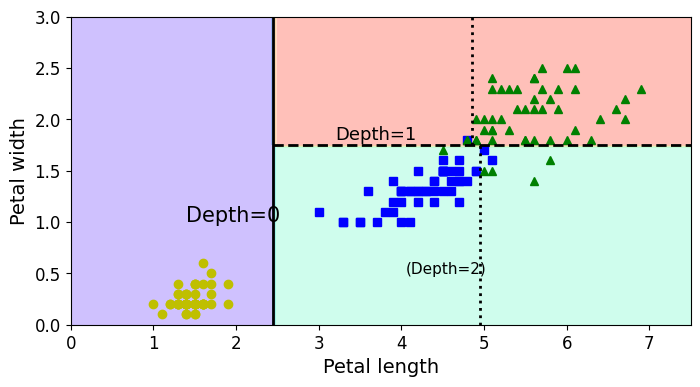

In [5]:
## script de vizualização da tree
from matplotlib.colors import ListedColormap

def plot_decision_boundary(clf, X, y, axes=[0, 7.5, 0, 3], iris=True, legend=False, plot_training=True):
    x1s = np.linspace(axes[0], axes[1], 100)
    x2s = np.linspace(axes[2], axes[3], 100)
    x1, x2 = np.meshgrid(x1s, x2s)
    X_new = np.c_[x1.ravel(), x2.ravel()]
    y_pred = clf.predict(X_new).reshape(x1.shape)
    custom_cmap = ListedColormap(['#fafab0','#9898ff','#a0faa0'])
    plt.contourf(x1, x2, y_pred, alpha=0.3, cmap='rainbow')
    if not iris:
        plt.contour(x1, x2, y_pred, cmap='rainbow', alpha=0.8)
    if plot_training:
        plt.plot(X[:, 0][y==0], X[:, 1][y==0], "yo", label="Iris-Setosa")
        plt.plot(X[:, 0][y==1], X[:, 1][y==1], "bs", label="Iris-Versicolor")
        plt.plot(X[:, 0][y==2], X[:, 1][y==2], "g^", label="Iris-Virginica")
        plt.axis(axes)
    if iris:
        plt.xlabel("Petal length", fontsize=14)
        plt.ylabel("Petal width", fontsize=14)
    else:
        plt.xlabel(r"$x_1$", fontsize=18)
        plt.ylabel(r"$x_2$", fontsize=18, rotation=0)
    if legend:
        plt.legend(loc="lower right", fontsize=14)


plt.figure(figsize=(8, 4))
plot_decision_boundary(tree_clf, X, y)
plt.plot([2.45, 2.45], [0, 3], "k-", linewidth=2)
plt.plot([2.45, 7.5], [1.75, 1.75], "k--", linewidth=2)
plt.plot([4.95, 4.95], [0, 1.75], "k:", linewidth=2)
plt.plot([4.85, 4.85], [1.75, 3], "k:", linewidth=2)
plt.text(1.40, 1.0, "Depth=0", fontsize=15)
plt.text(3.2, 1.80, "Depth=1", fontsize=13)
plt.text(4.05, 0.5, "(Depth=2)", fontsize=11)

#save_fig("decision_tree_decision_boundaries_plot")
plt.show()

**Exercício:** Generalize o ***script de visualização da tree*** acima para traçar as retas de decisão para qualquer tree, acessando diretamente os valores de decisão (***threshold***) do objeto tree_ de treinamento. Você pode utilizar esse [script](https://scikit-learn.org/stable/auto_examples/tree/plot_unveil_tree_structure.html#sphx-glr-auto-examples-tree-plot-unveil-tree-structure-py) do *scikit-learn* como exemplo de acesso à estrutura da tree.

No exemplo acima, o **depth=0** representa o limite de decisão do ***root node***.

* A área da esquerda é **pura** (Iris-Setosa, gini=0.0, **leaf** da esquerda na nossa tree), ela não pode ser mais divida.

* As áreas da direita são divididas pelo limite de decisão tracejado em negrito (depth=1). Como especificamos no nosso treinamento ***max_depth=2***, essas áreas não podem ser subdivididas.

* As linhas tracejadas mais claras representam como as áreas rosa e verde seriam sub-divididas caso tivéssemos permitido que nossa tree tivesse uma profundidade (depth) maior.

## Fazendo estimativas de classes e probabilidades

Uma Decision Tree também pode estimar a probabilidade de uma instância pertencer a uma determinada classe $k$:

1. percorre a Decision Tree até encontrar o **leaf node**;
1. retorna a razão entre as instâncias de treinamento da classe $k$ no node.

Por exemplo, se encontrarmos uma folha com pétalas de 5cm de comprimento e 1.5 cm de largura. Isso corresponde à folha da direita em depth=2 do nosso exemplo.
* probabilidade de que seja uma iris-setosa: $\frac{0}{54} = 0\%$
* probabilidade de que seja uma iris-versicolor: $\frac{49}{54} = 90.7\%$
* probabilidade de que seja uma iris-virginica: $\frac{5}{54} = 9.3\%$

==> predição da classe: **iris-versicolor** (classe 1), pois tem a maior probabilidade.

In [6]:
tree_clf.predict_proba([[5, 1.5]])
# lembrando que treinamos a tree somente com os atributos de comprimento e largura
# X = iris.data[:, 2:] # petal length and width

array([[0.        , 0.90740741, 0.09259259]])

In [7]:
tree_clf.predict([[5, 1.5]]) # para prever a classe.
# lembrando que 0: iris-setosa, 1: iris-versicolor, 2: iris-virginica

array([1])

## O algoritmo de treinamento CART

O **scikit-learn** usa o algoritmo de ***Classification and Regression Tree (CART)*** para treinar as Decision Trees.

O algoritmo CART:
1. Procura pelo par $(k, t_k)$ = (`feature`, `threshold`) que **maximiza a pureza** de seus sub-conjuntos (ou sub-nodes), pesando cada sub-node de acordo com seu tamanho;
1. Uma vez a amostra dividida em duas sub-amostras, divide novamente cada ***node*** aplicando a mesma lógica;
1. Aplica essa lógica recursivamente até atingir o valor do hyperparâmetro `max_depth` ou se não conseguir encontrar um valor que reduza a impureza.
1. Alguns outros hyperparâmetros controlam a parada do algoritmo: `min_samples_split`, `min_samples_leaf`, `min_weight_fraction_leaf`, `max_leaf_nodes`.

A função que o algoritmo tenta minimizar é a seguinte:

\begin{equation*}
J(k, t_k) = \frac{m_{left}}{m}G_{left} + \frac{m_{right}}{m}G_{right}
\end{equation*}

Onde
* $G_{left/right}$ mede a impureza do subconjunto à esquerda/direita
* $m_{left/right}$ é o número de instâncias no subconjunto à esquerda/direita

\\
O algoritmo CART minimiza a função a nível de `depth`, ou seja, não executa a minimização em outros níveis mais à frente.

### Impureza Gini ou Entropia?

Quando o classificador `tree.DecisionTreeClassifier` é chamado, o hyperparâmetro `criterion='gini'` por default.

Mas existe uma outra possibilidade: `criterion='entropy'`, que também é usada para medir a impureza de um node. A entropia é zero quando um `node` contém instâncias de somente uma classe.

A equação abaixo mostra a definição de entropia para o `i-ésimo node`:

\begin{equation*}
H_i = - \sum_{k=1}^{n} p_{i,k}log(p_{i,k})
\end{equation*}

A entropia para o `node` à esquerda em `depth=2` é dada por:

In [8]:
import math
H_i = -(49/54)*math.log(49/54) - (5/54)*math.log(5/54)
print(round(H_i,2))

0.31


Em geral ambos hyperparâmetros levam a Trees similares e o parâmetro Gini é mais rápido de calcular.

Quando os dois parâmetros diferem, o Gini tende a isolar a classe mais frequente em uma única `branch`, enquanto a `entropy` produz uma Tree mais balanceada.

### Hyperparâmetros de Regularização

As Decision Trees não têm parâmetros pré-definidos, como é o caso, por exemplo de modelos lineares. Sendo assim, se deixadas sem restrições de parâmetros, as `decision trees` tendem a reproduzir os dados de treinamento e consequentemente, resultar em um `overfitting`.

Para evitar o `overfitting` dos dados de treinamento, é preciso restringir a "liberdade" da `Decision Tree` durante o treinamento ==> **regularização**.

Hyperparâmetros de regularização:
* `max_depth`: restringe a "profundidade" da tree. No scikit-learn, o default é "None";
* `min_samples_split`: número mínimo de amostras um `node` deve ter antes de se dividir;
* `min_samples_leaf`: número mínimo de amostras que um `node` `leaf` deve ter;
* `min_weight_fraction_leaf`: fração mínima de amostras em relação ao número de instâncias consideradas com peso.
* `max_leaf_nodes`: número máximo de `nodes leaf`;
* `max_features`: número máximo de `features` que são consideradas para dividir cada `node`

O modelo será **regularizado** ao aumentarmos o valor dos hyperparâmetros `min_*` e diminuirmos os `max_*`

A seguir vemos um exemplo de regularização, utilizando um conjunto de dados de "luas" para treinar a nossa Tree.

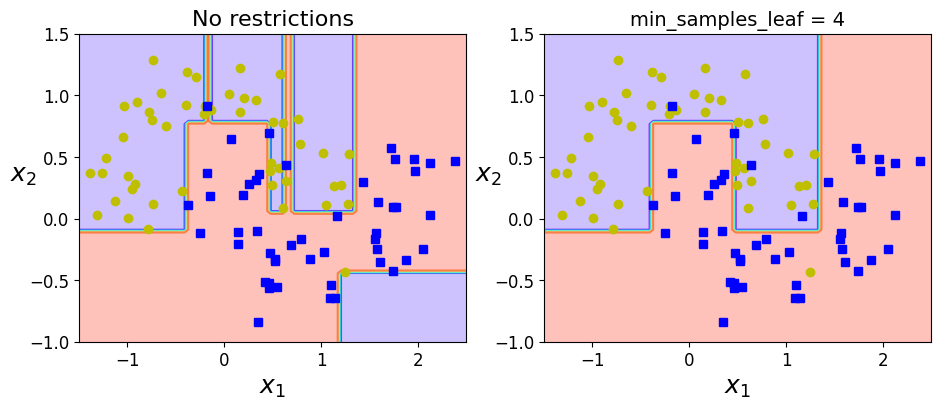

In [9]:
from sklearn.datasets import make_moons
Xm, ym = make_moons(n_samples=100, noise=0.25, random_state=53)

deep_tree_clf1 = DecisionTreeClassifier(random_state=42)
deep_tree_clf2 = DecisionTreeClassifier(min_samples_leaf=4, random_state=42)

deep_tree_clf1.fit(Xm, ym)
deep_tree_clf2.fit(Xm, ym)

plt.figure(figsize=(11, 4))
plt.subplot(121)
plot_decision_boundary(deep_tree_clf1, Xm, ym, axes=[-1.5, 2.5, -1, 1.5], iris=False)
plt.title("No restrictions", fontsize=16)
plt.subplot(122)
plot_decision_boundary(deep_tree_clf2, Xm, ym, axes=[-1.5, 2.5, -1, 1.5], iris=False)
plt.title("min_samples_leaf = {}".format(deep_tree_clf2.min_samples_leaf), fontsize=14)

#save_fig("min_samples_leaf_plot")
plt.show()

**Exercício:** Adicione uma terceira Tree, com diferentes hyperparâmetros e compare o resultado com os mostrados acima.

## Regressão

As `Decision Trees` também são capazes de executar tarefas de **regressão**. Vamos construir uma `Tree de regressão` usando a classe do scikit-learn [`DecisionTreeRegressor`](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html#sklearn.tree.DecisionTreeRegressor).

> treiná-la em um conjunto de dados ruidoso, com `max_depth=2`.


In [10]:
def quadratic_plus_noise(m = 200):
  """Quadratic training set + noise
    m: number of samples
  """
  np.random.seed(42)
  X = np.random.rand(m, 1)
  y = 4 * (X - 0.5) ** 2
  y = y + np.random.randn(m, 1) / 10
  return X, y

X, y = quadratic_plus_noise()

In [11]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor(max_depth=2, random_state=42)
tree_reg.fit(X, y)
print(tree_reg.tree_.threshold)

[ 0.19734927  0.09169627 -2.         -2.          0.77175754 -2.
 -2.        ]


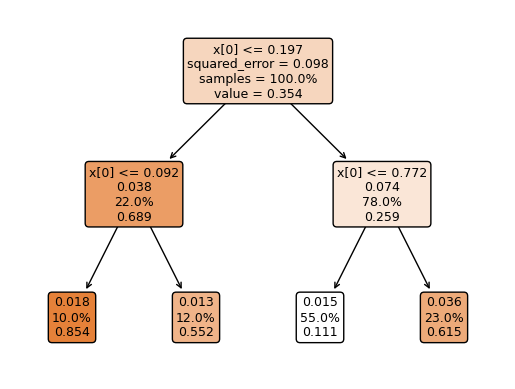

In [12]:
plot_tree(tree_reg,filled=True,rounded=True, fontsize=9,proportion=True,label="root")
plt.show()

A `Tree` acima é bem similar à que obtivemos anteriormente. A principal diferença é que ao invés de prever uma classe em cada `node`, ela prevê **um valor**.

Se quisermos prever um valor para uma nova instância, $x_1 = 0.6$.
> percorremos a `Tree` do topo;

> chegamos na `leaf` em que `value = 0.1106` ==> Esse valor é a média dos valores `targets` das 110 instâncias (`sample=110`) desse `node leaf`;

> o erro associado a esse valor é o `Erro Quadrático Médio (MSE)`,  $\left(\sigma/\sqrt{N}\right)^2$.

> No nosso exemplo $MSE = 0.0151$


Vamos visualizar as predições da nossa `Tree`, do modelo Quadrático com ruído, que geramos acima.

Utilizamos duas configurações diferentes de hyperparâmetros.

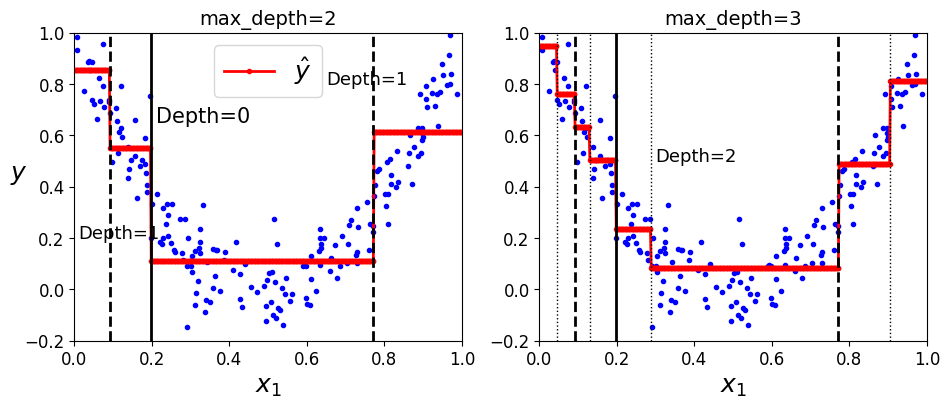

In [13]:
from sklearn.tree import DecisionTreeRegressor

tree_reg1 = DecisionTreeRegressor(random_state=42, max_depth=2)
tree_reg2 = DecisionTreeRegressor(random_state=42, max_depth=3)
tree_reg1.fit(X, y)
tree_reg2.fit(X, y)

def plot_regression_predictions(tree_reg, X, y, axes=[0, 1, -0.2, 1], ylabel="$y$"):
    x1 = np.linspace(axes[0], axes[1], 500).reshape(-1, 1)
    y_pred = tree_reg.predict(x1)
    plt.axis(axes)
    plt.xlabel("$x_1$", fontsize=18)
    if ylabel:
        plt.ylabel(ylabel, fontsize=18, rotation=0)
    plt.plot(X, y, "b.")
    plt.plot(x1, y_pred, "r.-", linewidth=2, label=r"$\hat{y}$")

plt.figure(figsize=(11, 4))
plt.subplot(121)
plot_regression_predictions(tree_reg1, X, y)
for split, style in ((0.1973, "k-"), (0.0917, "k--"), (0.7718, "k--")):
    plt.plot([split, split], [-0.2, 1], style, linewidth=2)
plt.text(0.21, 0.65, "Depth=0", fontsize=15)
plt.text(0.01, 0.2, "Depth=1", fontsize=13)
plt.text(0.65, 0.8, "Depth=1", fontsize=13)
plt.legend(loc="upper center", fontsize=18)
plt.title("max_depth=2", fontsize=14)

plt.subplot(122)
plot_regression_predictions(tree_reg2, X, y, ylabel=None)
for split, style in ((0.1973, "k-"), (0.0917, "k--"), (0.7718, "k--")):
    plt.plot([split, split], [-0.2, 1], style, linewidth=2)
for split in (0.0458, 0.1298, 0.2873, 0.9040):
    plt.plot([split, split], [-0.2, 1], "k:", linewidth=1)
plt.text(0.3, 0.5, "Depth=2", fontsize=13)
plt.title("max_depth=3", fontsize=14)

#save_fig("tree_regression_plot")
plt.show()

Note que os valores de predição equivalem à média dos valores das `targets` das instâncias de cada região.

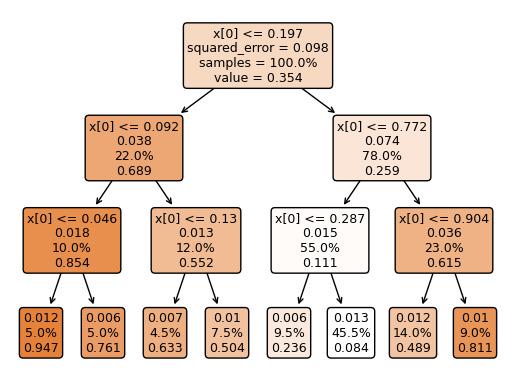

In [14]:
plot_tree(tree_reg2,filled=True,rounded=True, fontsize=9,proportion=True,label="root")
plt.show()

**Exercício:** Generalize o script acima para pegar diretamente do objeto tree_ os valores de `threshold` de cada `node` e use esse valores para fazer a visualização da `Tree`.

### Overfitting na Regressão
Assim como para Classificação, as `Decision Trees` estão sujeitas ao overfitting se não regularizarmos os hyperparâmetros.

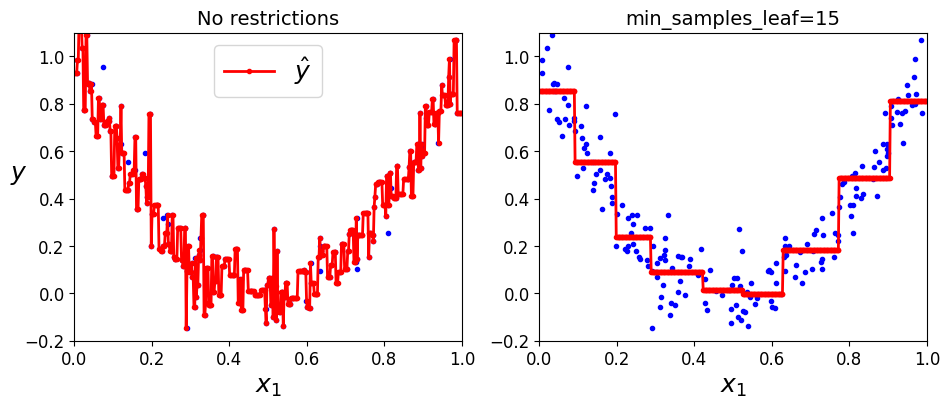

In [15]:
tree_reg1 = DecisionTreeRegressor(random_state=42)
tree_reg2 = DecisionTreeRegressor(random_state=42, min_samples_leaf=15)
tree_reg1.fit(X, y)
tree_reg2.fit(X, y)

x1 = np.linspace(0, 1, 500).reshape(-1, 1)
y_pred1 = tree_reg1.predict(x1)
y_pred2 = tree_reg2.predict(x1)

plt.figure(figsize=(11, 4))

plt.subplot(121)
plt.plot(X, y, "b.")
plt.plot(x1, y_pred1, "r.-", linewidth=2, label=r"$\hat{y}$")
plt.axis([0, 1, -0.2, 1.1])
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", fontsize=18, rotation=0)
plt.legend(loc="upper center", fontsize=18)
plt.title("No restrictions", fontsize=14)

plt.subplot(122)
plt.plot(X, y, "b.")
plt.plot(x1, y_pred2, "r.-", linewidth=2, label=r"$\hat{y}$")
plt.axis([0, 1, -0.2, 1.1])
plt.xlabel("$x_1$", fontsize=18)
plt.title("min_samples_leaf={}".format(tree_reg2.min_samples_leaf), fontsize=14)

#save_fig("tree_regression_regularization_plot")
plt.show()

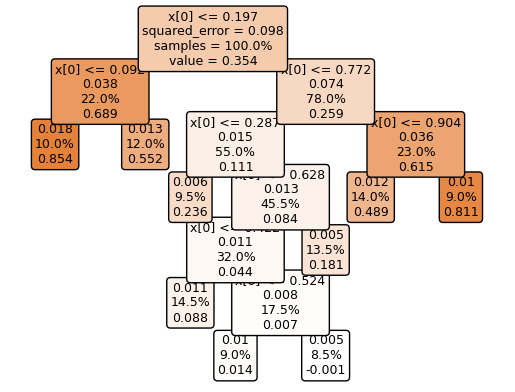

In [16]:
plot_tree(tree_reg2,filled=True,rounded=True, fontsize=9,proportion=True,label="root")
plt.show()

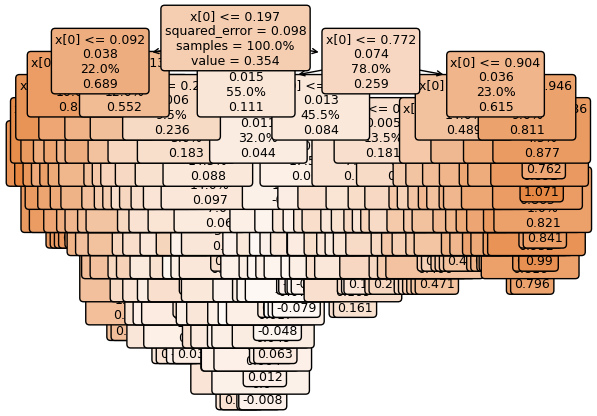

In [17]:
plot_tree(tree_reg1,filled=True,rounded=True, fontsize=9,proportion=True,label="root")
plt.show()

**Exercícios:**
1.   Tente diferentes configurações de hyperparâmetros e veja como a `Tree` se comporta.

2.   Tente outra função e veja como a regressão ainda segue os dados direitinho. (senoidal, cubica, etc)



### Instabilidade

As `Decision Trees` são muito sensíveis a variações do conjunto de dados de treino.

Por exemplo, vejamos o que acontece se retirarmos do conjunto de dados de treino das flores íris com o qual começamos essa aula, a íris-Versicolor com maior largura.

In [18]:
X = iris.data[:, 2:] # petal length and width
y = iris.target

X[(X[:, 1]==X[:, 1][y==1].max()) & (y==1)] # widest Iris-Versicolor flower

array([[4.8, 1.8]])

In [19]:
not_widest_versicolor = (X[:, 1]!=1.8) | (y==2)
X_tweaked = X[not_widest_versicolor]
y_tweaked = y[not_widest_versicolor]

tree_clf_tweaked = DecisionTreeClassifier(max_depth=2, random_state=40)
#tree_clf_tweaked.fit(X_tweaked, y_tweaked)
tree_clf_tweaked.fit(X,y)

DecisionTreeClassifier(max_depth=2, random_state=40)

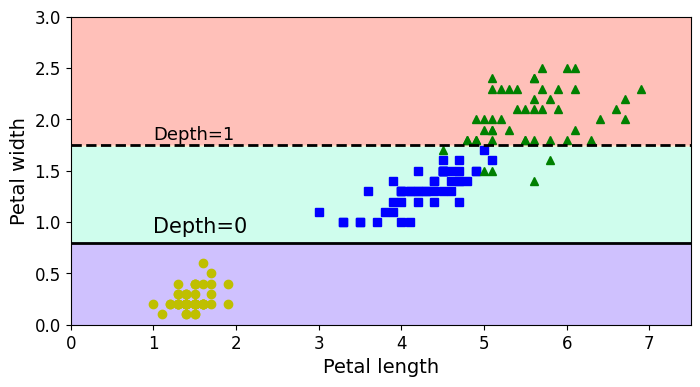

In [20]:
plt.figure(figsize=(8, 4))
plot_decision_boundary(tree_clf_tweaked, X_tweaked, y_tweaked, legend=False)
plt.plot([0, 7.5], [0.8, 0.8], "k-", linewidth=2)
plt.plot([0, 7.5], [1.75, 1.75], "k--", linewidth=2)
plt.text(1.0, 0.9, "Depth=0", fontsize=15)
plt.text(1.0, 1.80, "Depth=1", fontsize=13)

#save_fig("decision_tree_instability_plot")
plt.show()

### Exercícios (livro, capítulo 6):

7. Treine e ajuste a `Decision Tree` do conjunto de dados de "luas" (*moon's dataset*).

   1. Gere o conjunto de dados de "luas" usando `make_moons(n_samples=10000, noise=0.4)`;
   
   1. Divida-o em um conjunto de treino e um de teste, usando a função `train_test_split()`;
   
   1. Use o método de busca com validação cruzada (*grid search with cross-validation*), com a ajuda da classe `GridSearchCV` para encontrar bons valores de hyperparâmetros para um `DecisionTreeClassifier`. Dica: tente diferentes valores para `max_leaf_nodes`;
   
   1. Treine o estimador no conjunto de dados completo usando esses hyperparâmetros e meça o desempenho do seu modelo no conjunto de dados de teste. Você deve obter uma acurácia de aproximadamente 85% a 87%.
   
   
8. Faça crescer uma floresta.

   1. Continuando do exercício anterior, gere 1000 sub-conjuntos do conjunto de treinamento, cada sub-conjunto contendo 100 instâncias selecionadas aleatoriamente. Dica: você pode usar a classe do scikit-learn, `ShuffleSplit`;
   
   1. Treine uma `Decision Tree` em cada sub-conjunto, usando os melhores valores de hyperparâmetro encontrados no exercício anterior. Estime o desempenho desses 1000 conjuntos de treinamento no conjunto de teste (como eles foram treinados em um número menor de amostras, a performance será um pouco pior do que a encontrada no exercício anterior, com uma acurácia em torno de 80%);
   
   1. Para cada instância do conjunto de teste, gere as predições das 1000 `Decision Trees` e só guarde as predições mais frequentes (você pode usar a função `mode()` do  SciPy). Isso fornece o que é conhecido como *majority vote predictions* do conjunto de teste;
   
   1. Estime as predições no conjunto de teste: você deve obteve no conjunto de teste: a acurácia deve ser um pouco maior que a do item anterior (da ordem de 0.5 a 1.5%). **Parabéns!** Você treinou um classificador `Random Forest`! :-)

## Referências

* Como acessar a **estrutura** da Decision Tree no ***scikit-learn***: https://scikit-learn.org/stable/auto_examples/tree/plot_unveil_tree_structure.html#sphx-glr-auto-examples-tree-plot-unveil-tree-structure-py